In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from datetime import datetime
import shutil
import logging

In [8]:
logging.basicConfig(filename=f"log/log-{datetime.now().strftime('%d-%m-%Y %Hh%Mm%Ss')}",
                            filemode='a',
                            format='%(asctime)s,%(msecs)d %(name)s %(levelname)s %(message)s',
                            datefmt='%H:%M:%S',
                            level=logging.DEBUG)

logging.info("Running Localization Log \n")

In [9]:
end_area = 0
end_error = 0
current_line = 0
backup_file = "./backup/16-02-2022 22h07m49s.vec"
main_file = "General-0.vec"
with open(main_file, "r") as ins:
    file = []
    for line in ins:
        current_line += 1
        file.append(line)
        split_line = line.rstrip().split('	')
        if split_line[0] == '16':
            end_error = current_line
        if split_line[0] == '17':
            end_area = current_line
print(end_area)
print(end_error)
print(len(file))
shutil.copy("General-0.vec", f"./backup/{datetime.now().strftime('%d-%m-%Y %Hh%Mm%Ss')}.vec")

5930
2975
5930


'./backup/16-02-2022 23h09m33s.vec'

In [10]:
ERROR = {"start": 21, "end": end_error, "name": "Error"}
AREA= {"start": end_error + 1, "end": end_area, "name": "Area"}
RECORDS = [AREA, ERROR]

              Area
count  2955.000000
mean      0.010013
std       0.181587
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       4.550080


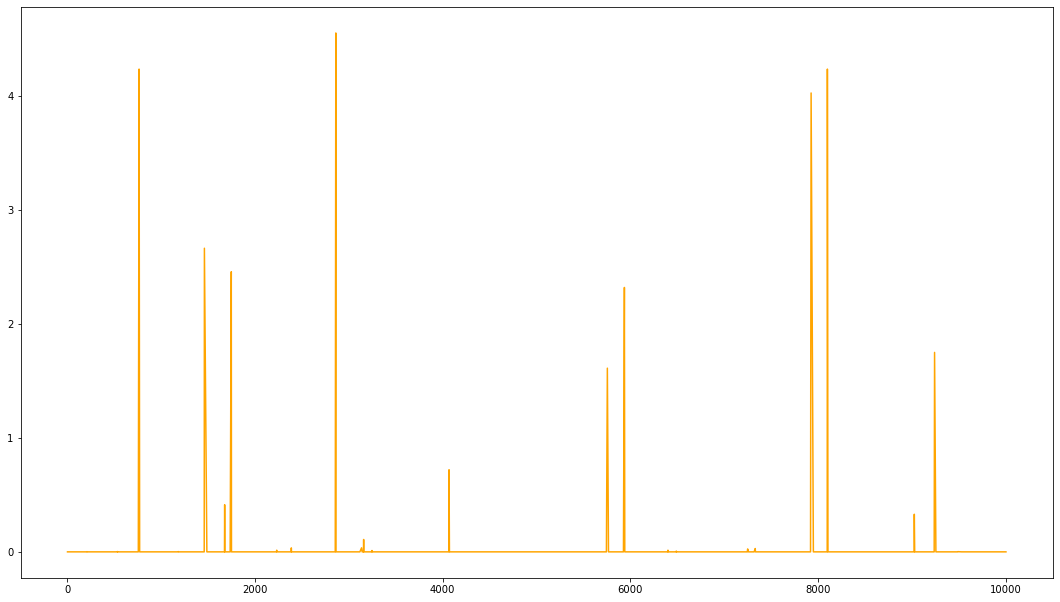

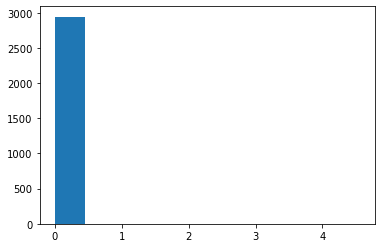

             Error
count  2955.000000
mean      0.090475
std       0.099713
min       0.001460
25%       0.018538
50%       0.028595
75%       0.156297
max       0.371201


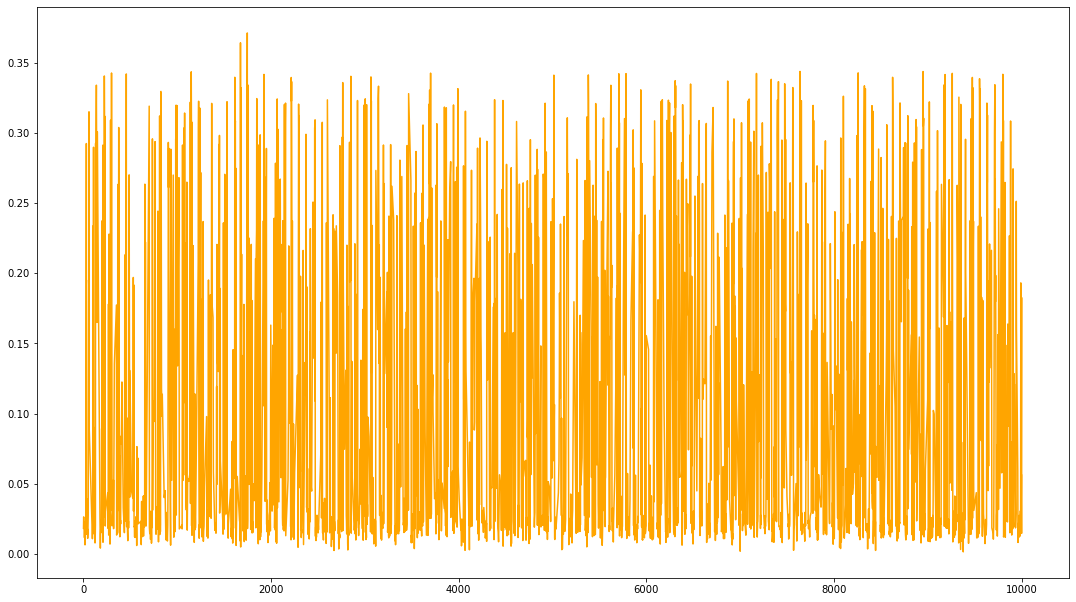

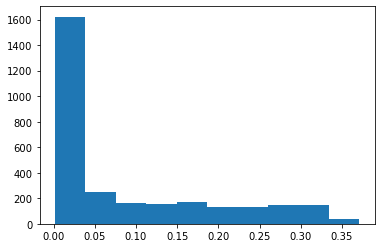

In [11]:
for record in RECORDS:
    data_histogram_x = []
    data_histogram_y= []
    for i in range(record['start']-1, record['end'],1):
        split_line = file[i].rstrip().split('	')
        # print(split_line)

        data_histogram_x.append(float(split_line[2]))
        data_histogram_y.append(float(split_line[3]))

    data_histogram_y_pd = pd.DataFrame(data_histogram_y, columns=[record['name']])
    
    logging.info(data_histogram_y_pd.round(6).describe())
    # Shut down the logger
    logging.shutdown()

    plt.plot(data_histogram_x,data_histogram_y, c="orange")
    
    print(data_histogram_y_pd.round(6).describe())
    fig = plt.gcf()
    fig.set_size_inches(18.5, 10.5)
    fig.savefig(f"{record['name']}.png", dpi=100, facecolor=(1, 1, 1))
    plt.show()
    plt.hist(data_histogram_y, bins=10)
    plt.show()

             Delay
count  2954.000000
mean      3.383413
std       3.594826
min       2.016667
25%       2.016667
50%       2.016667
75%       4.033335
max      30.250010


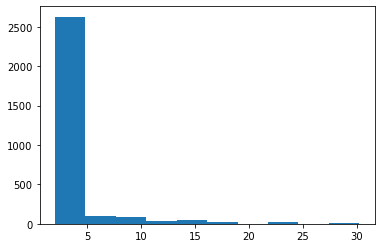

In [12]:
delay_pd = pd.DataFrame(np.diff(data_histogram_x), columns=['Delay'])
plt.hist(delay_pd)
print(delay_pd.describe())